# Step1: Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Step2: Reading, Understanding and Visualizing the Data

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
## To check the size of columns and rows
bike.shape

(730, 16)

In [6]:
## To check if any missing values from the columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [42]:
## Drop the columns of casual and registered - It have the cnt, calculated from casual and registered
## Drop the dteday - It have the year, month etc
## Drop the instant - it is just index values

bike_dt = bike.drop(['casual','registered','dteday','instant'], axis=1)
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


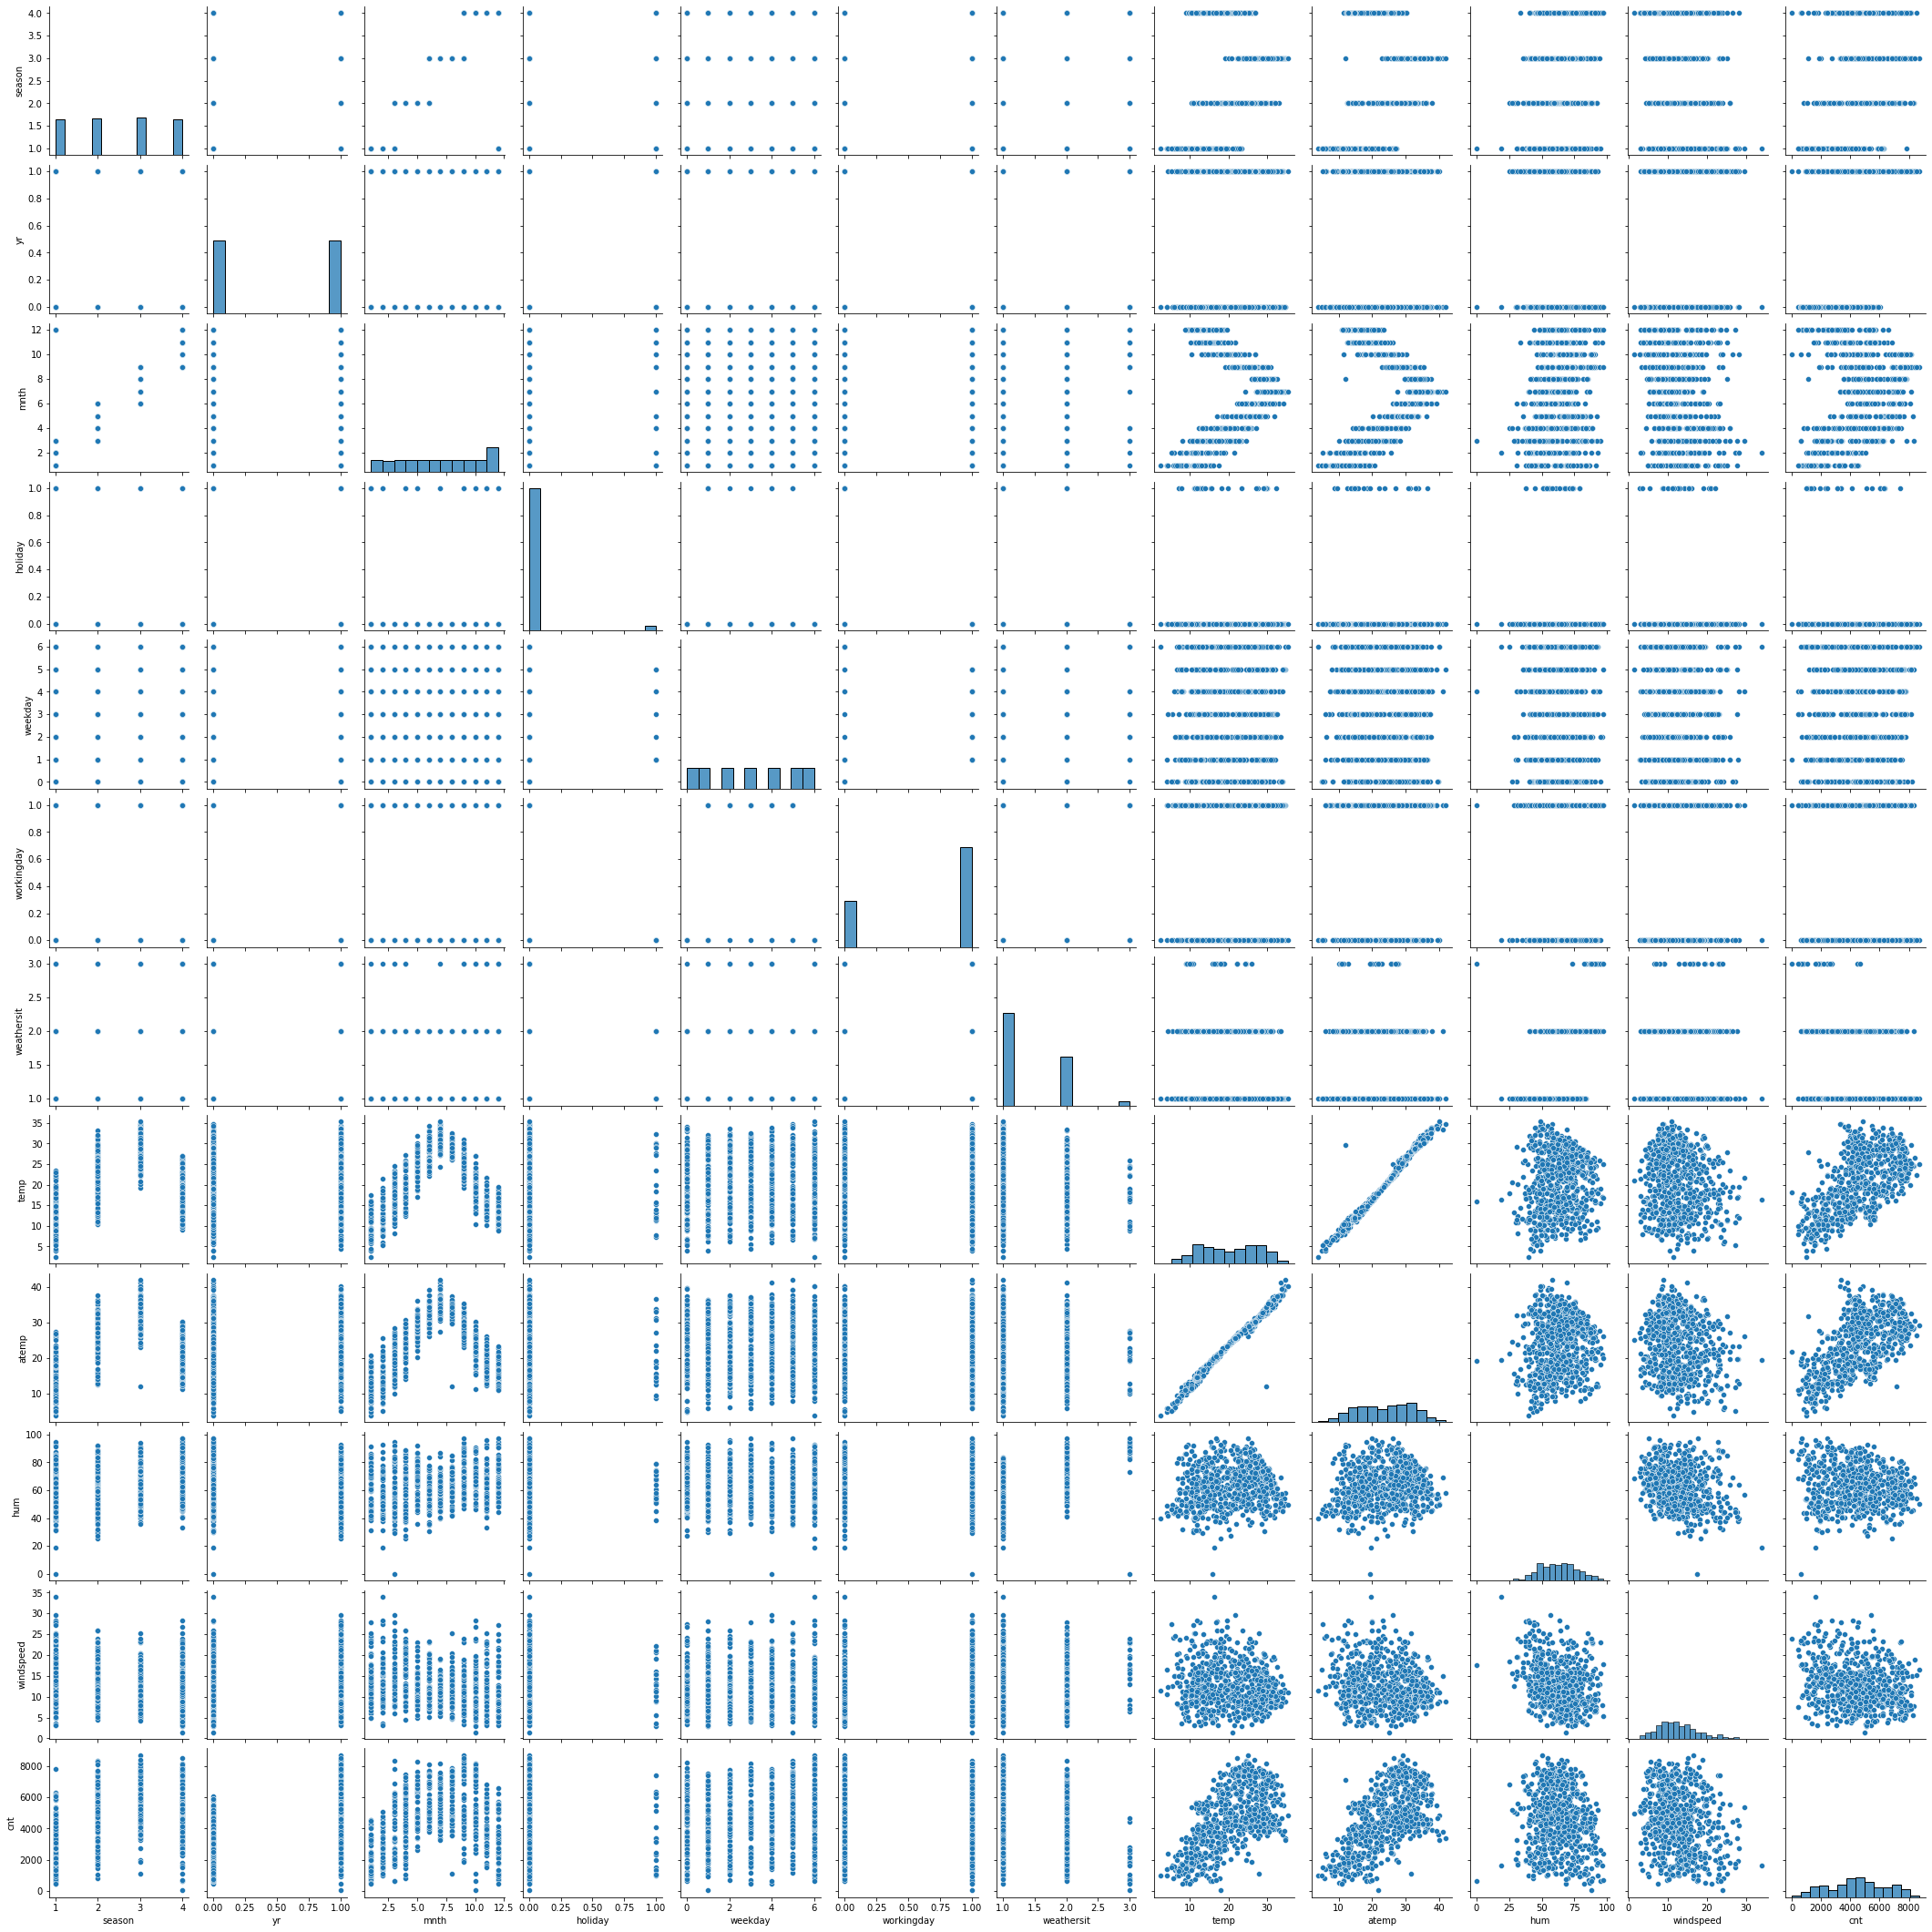

In [43]:
## Visualizing the numeric variable with pairplot
sns.pairplot(bike_dt)
plt.show()

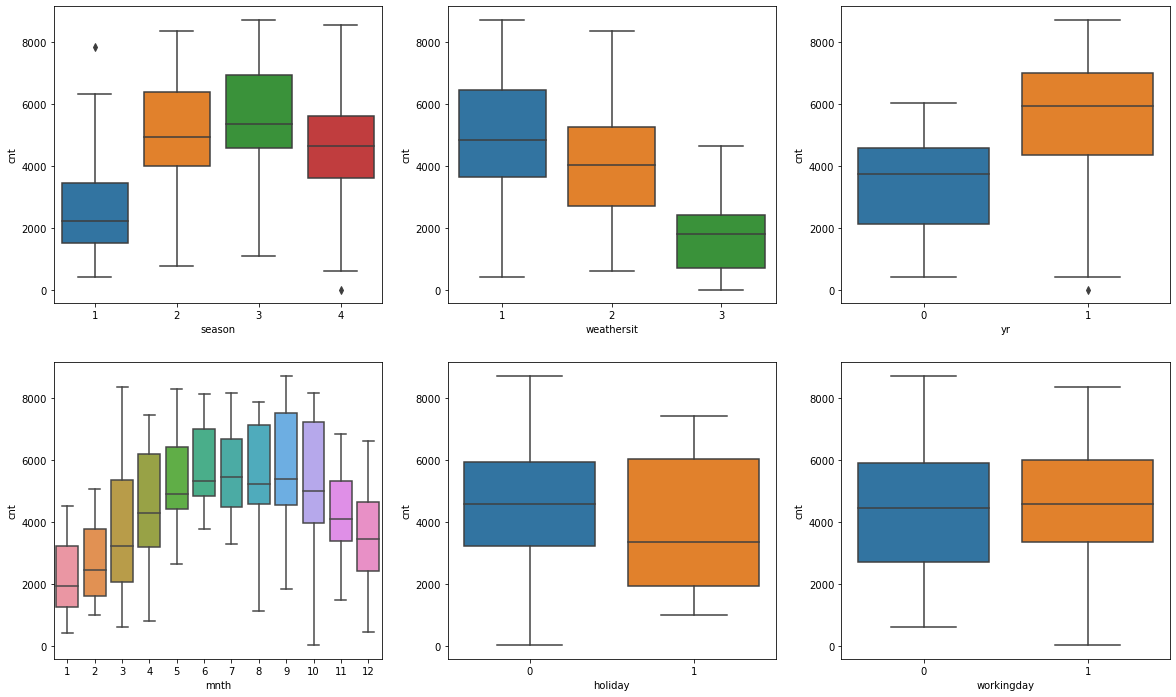

In [44]:
## Visualizing the Categorical variable
plt.figure(figsize = (20,12))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_dt)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bike_dt)

plt.subplot(2,3,3)
sns.boxplot(x='yr', y='cnt', data=bike_dt)

plt.subplot(2,3,4)
sns.boxplot(x='mnth', y='cnt', data=bike_dt)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike_dt)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_dt)

plt.show()

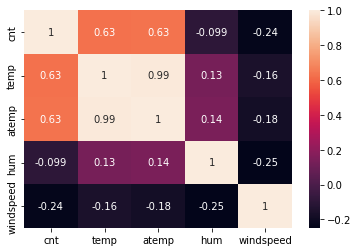

In [33]:
## Correlation between the numerical variables

covars = ['cnt','temp','atemp','hum','windspeed']
sns.heatmap(bike_dt[covars].corr(), annot=True)
plt.show()


# Step3: Preparing the data for modelling (train_test_spli, rescaling etc)

In [22]:
### Encoding/mapping the columens

In [45]:
## Map the season column

bike_dt.season = bike_dt.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [46]:
bike_dt.mnth = bike_dt.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [47]:
bike_dt.weekday = bike_dt.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [48]:
bike_dt.weathersit = bike_dt.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [49]:
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [50]:
month_df = pd.get_dummies(bike_dt['mnth'], drop_first=True)
weekday_df = pd.get_dummies(bike_dt['weekday'], drop_first=True)
weathersit_df = pd.get_dummies(bike_dt['weathersit'], drop_first=True)
season_df = pd.get_dummies(bike_dt['season'], drop_first=True)

In [51]:
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [52]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_dt = pd.concat([bike_dt,month_df,weekday_df,weathersit_df,season_df],axis=1)
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [53]:
### Dropping unnecessary columns from the datafrane

bike_dt = bike_dt.drop(['mnth','weekday','weathersit','season'], axis=1)
bike_dt.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [59]:
bike_dt.shape

(730, 30)

In [60]:
### Splitting into train and test

df_train, df_test = train_test_split(bike_dt, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [61]:
#### Rescaling the features with MinMaxScaler


##1. Intantiate the object
scaler = MinMaxScaler()

In [62]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [63]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

##2. Fit on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [64]:
### Check the max values from df_train dataframe

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step4: Training the model

<AxesSubplot:>

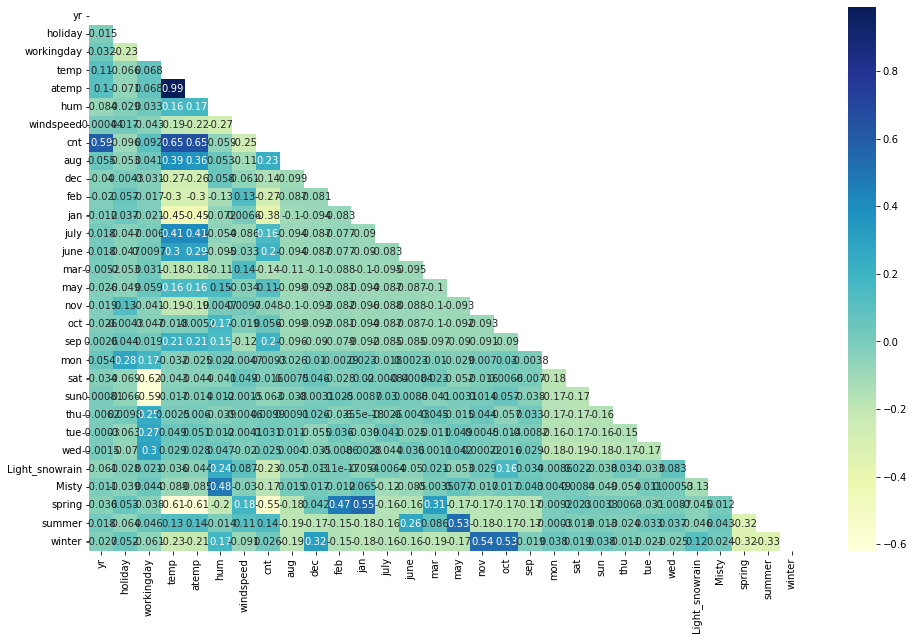

In [67]:
### Create visulaization of correlation between the variables

plt.figure(figsize=(16,10))

matrix = np.triu(df_train.corr())

sns.heatmap(df_train.corr(), annot=True, cmap ='YlGnBu', mask=matrix)

In [68]:
### Building the training model

y_train = df_train.pop('cnt')
x_train = df_train

In [70]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [73]:
## add constant with all variables

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.81e-180
Time:                        21:16:18   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2433      0.035      6.887      0.000       0.174       0.313
yr                 0.2325      0.008     28.794      0.000       0.217       0.248
holiday            0.0109      0.024      0.451      0.652      -0.037       0.058
workingday         0.0963      0.012      7.835      0.000       0.072       0.120
temp               0.3880      0.142      2.727      0.007       0.108       0.668
atemp              0.0590      0.138      0.426      0.670      -0.213       0.331
hum               -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed         -0.1836      0.026     -6.962      0.000      -0.235      -0.132
aug                0.0223      0.034      0.657      0.511      -0.044       0.089
dec               -0.0443      0.034     -1.316      0.189      -0.110       0.022
feb               -0.0323      0.033     -0.980      0.327      -0.097       0.032
jan               -0.0631      0.034     -1.876      0.061      -0.129       0.003
july              -0.0327      0.035     -0.931      0.352      -0.102       0.036
june               0.0060      0.025      0.241      0.810      -0.043       0.055
mar                0.0016      0.025      0.063      0.950      -0.047       0.050
may                0.0255      0.021      1.208      0.228      -0.016       0.067
nov               -0.0398      0.036     -1.093      0.275      -0.111       0.032
oct                0.0077      0.036      0.215      0.830      -0.063       0.078
sep                0.0868      0.032      2.711      0.007       0.024       0.150
mon               -0.0216      0.015     -1.401      0.162      -0.052       0.009
sat                0.0952      0.014      6.910      0.000       0.068       0.122
sun                0.0410      0.014      2.929      0.004       0.013       0.068
thu               -0.0097      0.016     -0.623      0.534      -0.040       0.021
tue               -0.0184      0.016     -1.184      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_snowrain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.701      0.000      -0.080      -0.039
spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer             0.0424      0.026      1.617      0.107      -0.009       0.094
winter             0.1071      0.028      3.826      0.000       0.052       0.162
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                   

### Checking VIF (variance inflation factor), It gives quantitative idea about how much the feature variables are connected each other

In [75]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
19,sat,19.71
20,sun,18.34
26,spring,10.77
28,winter,9.46
27,summer,8.29
15,nov,6.79
7,aug,6.47


In [85]:
### Drop the variable of High P value
## dropping mar variables
x = x_train.drop('mar', axis=1)

In [86]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.75e-181
Time:                        21:59:33   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2441      0.033      7.380      0.000       0.179       0.309
yr                 0.2325      0.008     28.824      0.000       0.217       0.248
holiday            0.0111      0.024      0.462      0.645      -0.036       0.058
workingday         0.0965      0.012      8.151      0.000       0.073       0.120
temp               0.3877      0.142      2.729      0.007       0.109       0.667
atemp              0.0588      0.138      0.425      0.671      -0.213       0.330
hum               -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed         -0.1837      0.026     -6.983      0.000      -0.235      -0.132
aug                0.0216      0.032      0.676      0.499      -0.041       0.084
dec               -0.0456      0.026     -1.755      0.080      -0.097       0.005
feb               -0.0338      0.022     -1.517      0.130      -0.078       0.010
jan               -0.0646      0.022     -2.892      0.004      -0.109      -0.021
july              -0.0333      0.033     -0.999      0.318      -0.099       0.032
june               0.0055      0.024      0.233      0.816      -0.041       0.052
may                0.0251      0.020      1.268      0.205      -0.014       0.064
nov               -0.0410      0.031     -1.333      0.183      -0.102       0.019
oct                0.0065      0.031      0.213      0.831      -0.054       0.067
sep                0.0859      0.029      2.961      0.003       0.029       0.143
mon               -0.0216      0.015     -1.402      0.162      -0.052       0.009
sat                0.0954      0.013      7.159      0.000       0.069       0.122
sun                0.0411      0.014      3.011      0.003       0.014       0.068
thu               -0.0097      0.016     -0.622      0.535      -0.040       0.021
tue               -0.0184      0.016     -1.185      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_snowrain    -0.2550      0.026     -9.641      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.708      0.000      -0.080      -0.039
spring            -0.0447      0.028     -1.575      0.116      -0.101       0.011
summer             0.0421      0.026      1.637      0.102      -0.008       0.093
winter             0.1074      0.027      3.910      0.000       0.053       0.161
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                     2.77e+16
================================

In [87]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,74.90
3,temp,66.84
4,atemp,55.99
18,sat,17.21
19,sun,16.19
25,spring,9.66
27,winter,9.13
26,summer,7.99
7,aug,5.74
11,july,5.11


In [88]:
### Drop the variable of High P value
## dropping mar variables
x = x.drop('oct', axis=1)

In [89]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.68e-182
Time:                        22:01:39   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2455      0.032      7.586      0.000       0.182       0.309
yr                 0.2325      0.008     28.873      0.000       0.217       0.248
holiday            0.0117      0.024      0.494      0.622      -0.035       0.058
workingday         0.0967      0.012      8.209      0.000       0.074       0.120
temp               0.3882      0.142      2.736      0.006       0.109       0.667
atemp              0.0589      0.138      0.427      0.670      -0.212       0.330
hum               -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed         -0.1835      0.026     -6.986      0.000      -0.235      -0.132
aug                0.0190      0.029      0.644      0.520      -0.039       0.077
dec               -0.0495      0.018     -2.687      0.007      -0.086      -0.013
feb               -0.0349      0.022     -1.608      0.108      -0.078       0.008
jan               -0.0657      0.022     -3.010      0.003      -0.109      -0.023
july              -0.0360      0.031     -1.161      0.246      -0.097       0.025
june               0.0043      0.023      0.187      0.852      -0.041       0.049
may                0.0246      0.020      1.253      0.211      -0.014       0.063
nov               -0.0462      0.019     -2.426      0.016      -0.084      -0.009
sep                0.0827      0.025      3.336      0.001       0.034       0.131
mon               -0.0217      0.015     -1.408      0.160      -0.052       0.009
sat                0.0956      0.013      7.210      0.000       0.070       0.122
sun                0.0414      0.014      3.051      0.002       0.015       0.068
thu               -0.0097      0.016     -0.625      0.532      -0.040       0.021
tue               -0.0185      0.016     -1.190      0.235      -0.049       0.012
wed               -0.0059      0.015     -0.396      0.693      -0.035       0.023
Light_snowrain    -0.2548      0.026     -9.648      0.000      -0.307      -0.203
Misty             -0.0596      0.010     -5.721      0.000      -0.080      -0.039
spring            -0.0460      0.028     -1.655      0.099      -0.101       0.009
summer             0.0400      0.024      1.684      0.093      -0.007       0.087
winter             0.1101      0.024      4.539      0.000       0.062       0.158
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                     2.58e+16
==============================================================================

Notes:
[1] Standard Errors assume t

In [90]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,72.29
3,temp,66.83
4,atemp,55.99
17,sat,16.60
18,sun,15.58
24,spring,9.26
26,winter,7.14
25,summer,6.84
7,aug,4.90
11,july,4.42


In [91]:
## dropping mar variables
x = x.drop('june', axis=1)

In [92]:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.55e-183
Time:                        22:07:31   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2457      0.032      7.604      0.000       0.182       0.309
yr                 0.2323      0.008     29.009      0.000       0.217       0.248
holiday            0.0114      0.024      0.483      0.630      -0.035       0.058
workingday         0.0968      0.012      8.231      0.000       0.074       0.120
temp               0.3961      0.135      2.926      0.004       0.130       0.662
atemp              0.0554      0.137      0.405      0.685      -0.213       0.324
hum               -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed         -0.1841      0.026     -7.081      0.000      -0.235      -0.133
aug                0.0157      0.024      0.662      0.508      -0.031       0.062
dec               -0.0490      0.018     -2.690      0.007      -0.085      -0.013
feb               -0.0343      0.021     -1.599      0.110      -0.077       0.008
jan               -0.0648      0.021     -3.045      0.002      -0.107      -0.023
july              -0.0394      0.025     -1.598      0.111      -0.088       0.009
may                0.0229      0.017      1.319      0.188      -0.011       0.057
nov               -0.0459      0.019     -2.421      0.016      -0.083      -0.009
sep                0.0804      0.021      3.744      0.000       0.038       0.123
mon               -0.0216      0.015     -1.403      0.161      -0.052       0.009
sat                0.0959      0.013      7.264      0.000       0.070       0.122
sun                0.0416      0.014      3.079      0.002       0.015       0.068
thu               -0.0097      0.016     -0.624      0.533      -0.040       0.021
tue               -0.0185      0.016     -1.190      0.235      -0.049       0.012
wed               -0.0058      0.015     -0.390      0.697      -0.035       0.023
Light_snowrain    -0.2548      0.026     -9.657      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.725      0.000      -0.080      -0.039
spring            -0.0474      0.027     -1.771      0.077      -0.100       0.005
summer             0.0393      0.023      1.677      0.094      -0.007       0.085
winter             0.1086      0.023      4.756      0.000       0.064       0.153
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                     1.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest ei

In [93]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,72.18
3,temp,60.92
4,atemp,54.96
16,sat,16.55
17,sun,15.54
23,spring,8.60
24,summer,6.66
25,winter,6.34
1,holiday,3.98
7,aug,3.19


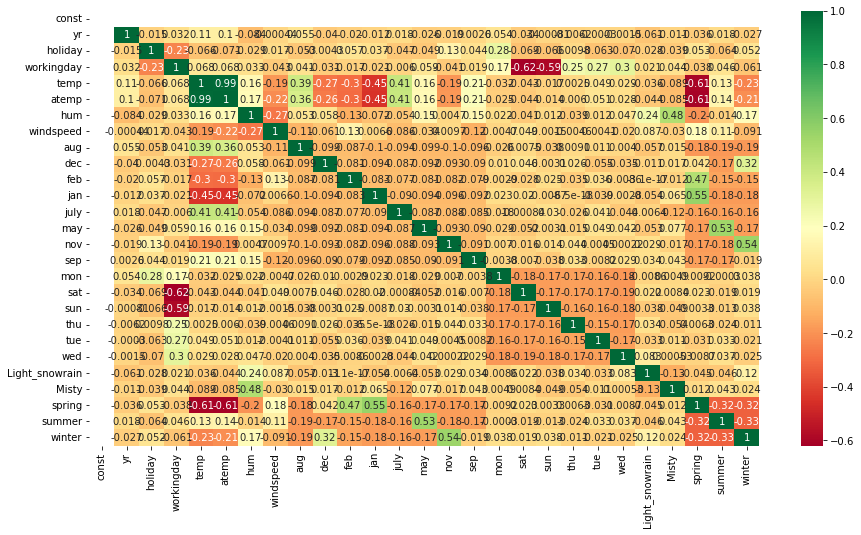

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_sm.corr(),annot = True, cmap="RdYlGn")
plt.show()

# Step5: Residual Analysis

In [94]:
y_train_pred = lr_model.predict(x_train_sm)
res = y_train - y_train_pred

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

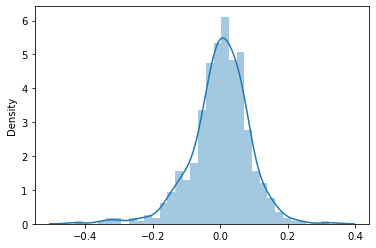

In [95]:
### For distribution of error terms
sns.distplot(res)

# Step6: Linear Model on the test set

In [99]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [100]:
y_test = df_test.pop('cnt')
x_test = df_test

In [101]:
### Add a constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,1,0,0,0,0,0,1,0


# Step7: Prediction & Evaluation

In [107]:
##Drop the variables
x_test_sm = x_test_sm.drop(['june', 'oct', 'mar'], axis=1)

In [111]:
### Predict the test model
y_test_pred = lr_model.predict(x_test_sm)

In [113]:
### Predict the train model
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

576    0.723213
426    0.522274
728    0.333639
482    0.620707
111    0.292496
         ...   
578    0.830931
53     0.260581
350    0.285017
79     0.294961
520    0.644091
Length: 510, dtype: float64

In [109]:
y_test_pred

184    0.393337
535    0.890924
299    0.423338
221    0.616701
152    0.590108
         ...   
702    0.682840
127    0.501314
640    0.817376
72     0.308000
653    0.751853
Length: 220, dtype: float64

In [120]:
### Evaluation - y_test
r2test = r2_score(y_true=y_test, y_pred=y_test_pred)
r2test

0.8288533283543489

In [114]:
### Evaluation - y_train
r2train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2train

0.8525738032825653

# Step8: Model Evaluation

Plot the graph for actual and predicted values.

Text(0, 0.5, 'y_test_pred')

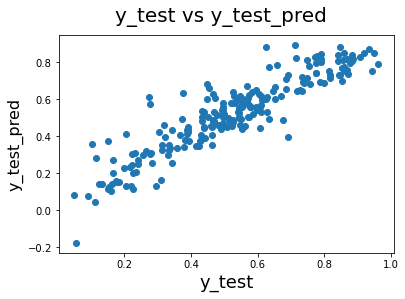

In [116]:
#### Visualize the data of y_test vs y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

Text(0, 0.5, 'y_train_pred')

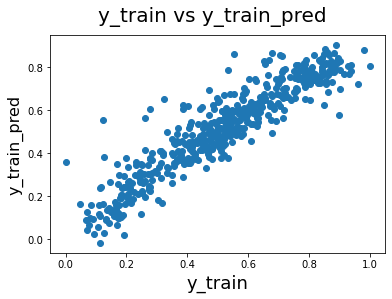

In [117]:
#### Visualize the data of y_test vs y_test_pred
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20) 
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_train_pred', fontsize = 16) 

In [121]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2test)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.8027


Summary:
    
bikes demand - It depend on the different variables like year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.